In [29]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc3


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(traindata, trainlabels), (testdata, testlabels) = fashion_mnist.load_data()

In [0]:
classnames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [32]:
traindata.shape

(60000, 28, 28)

In [33]:
len(trainlabels)

60000

In [34]:
trainlabels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [35]:
testdata.shape

(10000, 28, 28)

In [36]:
len(testlabels)

10000

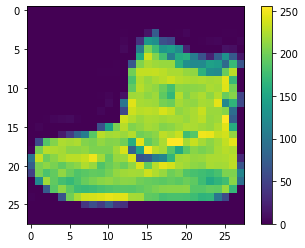

In [37]:
plt.figure()
plt.imshow(traindata[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
traindata = traindata / 255.0

testdata = testdata / 255.0

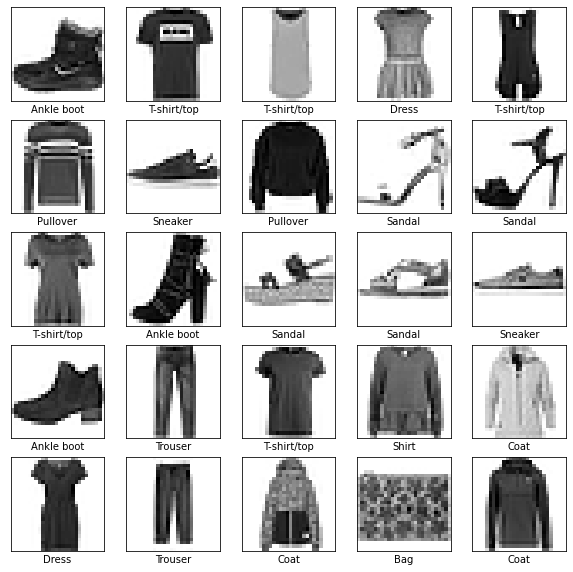

In [39]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(traindata[i], cmap=plt.cm.binary)
    plt.xlabel(classnames[trainlabels[i]])
plt.show()

In [0]:
mm = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
mm.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
mm.fit(traindata, trainlabels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5046 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3819 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3426 - accuracy: 0.8754
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3181 - accuracy: 0.8830
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2981 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2820 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2699 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2598 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2487 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [43]:
testloss, testacc = mm.evaluate(testdata,  testlabels, verbose=2)

print('\nTest accuracy:', testacc)

313/313 - 0s - loss: 0.3344 - accuracy: 0.8805

Test accuracy: 0.8805000185966492


In [0]:
probabilitymodel = tf.keras.Sequential([mm, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probabilitymodel.predict(testdata)


In [48]:
predictions[0]

array([6.4220994e-06, 1.7434614e-07, 4.6746925e-07, 3.8766153e-08,
       3.6296476e-07, 4.2024180e-03, 1.4035290e-05, 8.2913283e-03,
       7.2723878e-07, 9.8748404e-01], dtype=float32)

In [49]:
np.argmax(predictions[0])

9

In [50]:
testlabels[0]

9

In [0]:
def plot_image(i, predictionsarray, truelabel, img):
  predictionsarray, truelabel, img = predictionsarray, truelabel[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predictedlabel = np.argmax(predictionsarray)
  if predictedlabel == truelabel:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classnames[predictedlabel],
                                100*np.max(predictionsarray),
                                classnames[truelabel]),
                                color=color)

def plot_value_array(i, predictionsarray, truelabel):
  predictionsarray, truelabel = predictionsarray, truelabel[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictionsarray, color="#777777")
  plt.ylim([0, 1])
  predictedlabel = np.argmax(predictionsarray)

  thisplot[predictedlabel].set_color('red')
  thisplot[truelabel].set_color('blue')

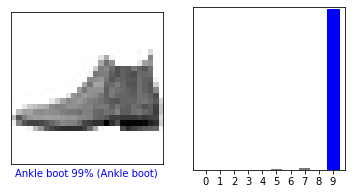

In [58]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], testlabels, testdata)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  testlabels)
plt.show()

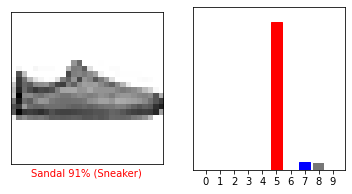

In [60]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], testlabels, testdata)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  testlabels)
plt.show()

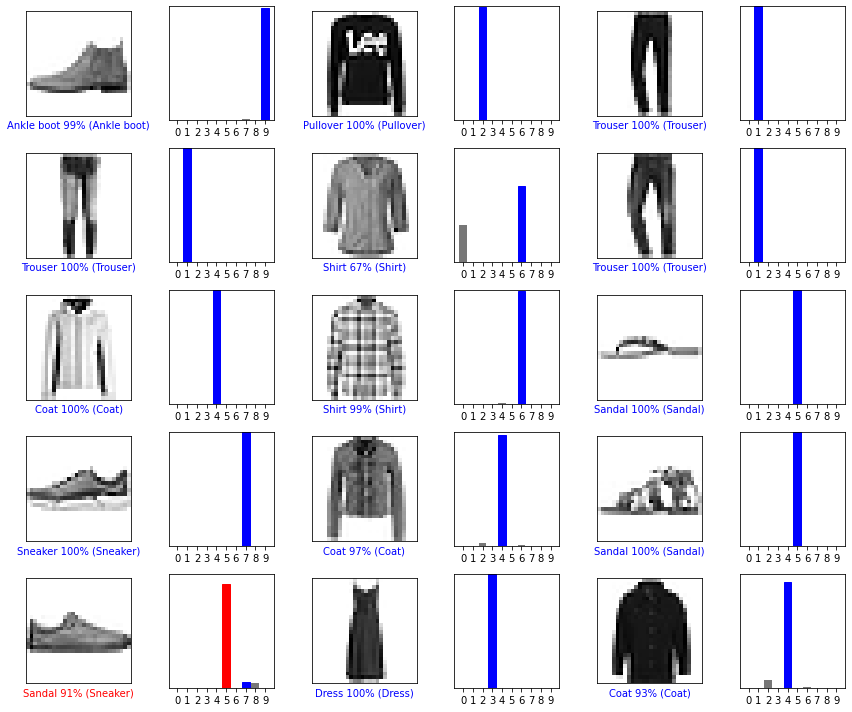

In [61]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], testlabels, testdata)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], testlabels)
plt.tight_layout()
plt.show()

In [63]:
# Grab an image from the test dataset.
img = testdata[1]

print(img.shape)

(28, 28)


In [64]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [66]:
predictionssingle = probabilitymodel.predict(img)

print(predictionssingle)

[[5.8553323e-05 2.2932212e-13 9.9756193e-01 2.0049826e-11 2.2913332e-03
  9.3797021e-24 8.8212946e-05 1.9580268e-21 1.4845915e-12 1.3579972e-16]]


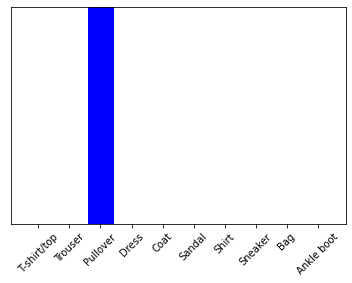

In [68]:
plot_value_array(1, predictionssingle[0], testlabels)
_ = plt.xticks(range(10), classnames, rotation=45)

In [69]:
np.argmax(predictionssingle[0])

2